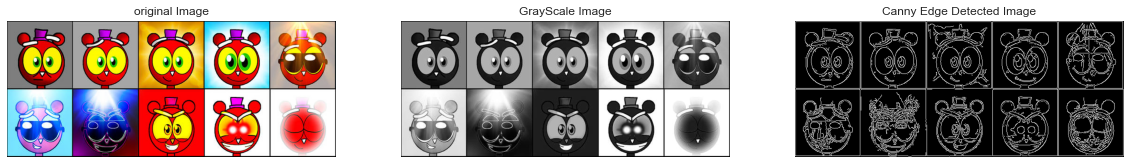

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
loaded_image = cv2.imread("canny.jpg")
loaded_image = cv2.cvtColor(loaded_image,cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(loaded_image,cv2.COLOR_BGR2GRAY)
edged_image = cv2.Canny(gray_image, threshold1=30, threshold2=100)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(loaded_image,cmap="gray")
plt.title("original Image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(gray_image,cmap="gray")
plt.axis("off")
plt.title("GrayScale Image")
plt.subplot(1,3,3)
plt.imshow(edged_image,cmap="gray")
plt.axis("off")
plt.title("Canny Edge Detected Image")
plt.show()

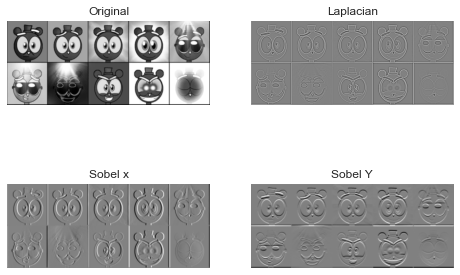

In [11]:
#Laplacian and Sobel Edge detecting methods
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Loading image
#imge = cv2.imread('SanFrancisco.jpg',) 
imge=cv2.imread("canny.jpg",)
#converting to gray scale 
gray = cv2.cvtColor(imge, cv2.COLOR_BGR2GRAY)
# remove noise
img = cv2.GaussianBlur (gray, (3,3),0)
#convolute with proper kernels
laplacian = cv2.Laplacian (img,cv2.CV_64F) 
sobelx = cv2.Sobel (img,cv2.CV_64F,1,0,ksize=5) #x 
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) #y
plt.subplot(2,2,1),
plt.imshow(img,cmap = 'gray')
plt.title('Original'),
plt.xticks([]), 
plt.yticks([])
plt.subplot(2,2,2), 
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian'),
plt.xticks([]), 
plt.yticks([])
plt.subplot(2,2,3),
plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel x'),
plt.xticks([]),
plt.yticks([])
plt.subplot(2,2,4),
plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y'),
plt.xticks([]),
plt.yticks([])
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
imge=cv2.imread("canny.jpg",)
#converting to gray scale 
gray = cv2.cvtColor(imge, cv2.COLOR_BGR2GRAY)
# remove noise
img_gaussian = cv2.GaussianBlur (gray, (3,3),0)

kernelx=np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely=np.array([[-1,0,1],[-1,0,1],[0,0,0]])
img_prewittx=cv2.filter2D(img_gaussian,-1,kernelx)
img_prewitty=cv2.filter2D(img_gaussian,-1,kernely)

cv2.imshow("original image",img)
cv2.imshow("prewitt x",img_prewittx)
cv2.imshow("prewitt y",img_prewitty)
cv2.imshow("prewitt ",img_prewittx+img_prewitty)
cv2.waitKey()
cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
roberts_cross_v=np.array([[1,0],
                         [0,-1]])
roberts_cross_h=np.array([[0,1],
                         [-1,0]])
img=cv2.imread("canny.jpg",0).astype('float64')
img/=255.0
vertical=ndimage.convolve( img, roberts_cross_v )
horizontal=ndimage.convolve( img, roberts_cross_h)
edged_img = np.sqrt( np.square (horizontal)+ np.square(vertical))
                    
edged_img*=255
cv2.imwrite("output.jpg",edged_img)
cv2.imshow("OutputImage", edged_img)
cv2.waitKey()
cv2.destroyAllWindows()